# kNN 算法

## 1.数据的简单显示

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
type(iris.data)

numpy.ndarray

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [14]:
X = iris.data[:, :2]
X.shape

(150, 2)

In [13]:
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

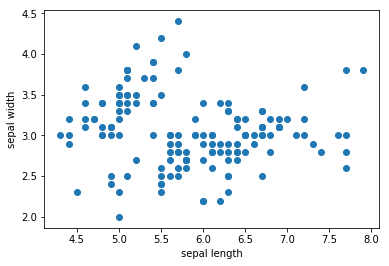

In [17]:
plt.scatter(X[:,0], X[:, 1])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [18]:
y = iris.target

In [19]:
X[y==0, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

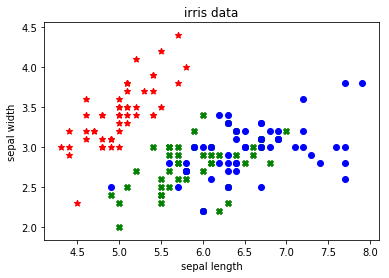

In [23]:
plt.scatter(X[y ==0 ,0], X[y==0, 1], color="red", marker="*")
plt.scatter(X[y ==1 ,0], X[y==1, 1], color="green", marker="X")
plt.scatter(X[y ==2 ,0], X[y==2, 1], color="blue", marker="o")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("irris data")
plt.show()

In [24]:
X = iris.data[:, 2:]

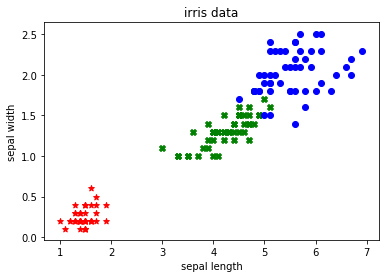

In [27]:
plt.scatter(X[y ==0 ,0], X[y==0, 1], color="red", marker="*")
plt.scatter(X[y ==1 ,0], X[y==1, 1], color="green", marker="X")
plt.scatter(X[y ==2 ,0], X[y==2, 1], color="blue", marker="o")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("irris data")
plt.show()

## 2. KNN算法实现

In [28]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [29]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

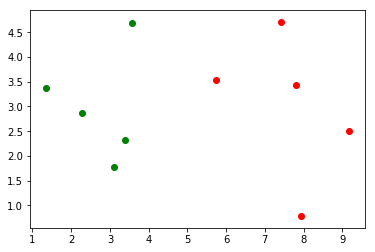

In [31]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],color='r')
plt.show()

In [32]:
x = np.array([8.09, 3.36])

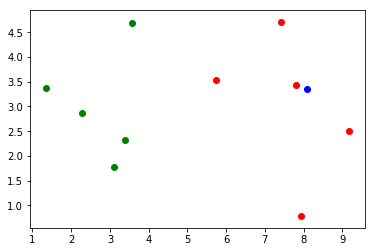

In [33]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],color='r')
plt.scatter(x[0], x[1],color='b' )
plt.show()

In [34]:
from math import sqrt

In [35]:
distance = [sqrt(np.sum(x_train -x)**2) for x_train in X_train]

In [36]:
distance

[5.725193408000001,
 6.558386879,
 6.737830214999999,
 3.188526848,
 6.302647298,
 0.669959817000001,
 2.1709582,
 0.23326966699999963,
 0.23312757799999995,
 2.7185419519999994]

In [37]:
nearest = np.argsort(distance)
nearest

array([8, 7, 5, 6, 9, 3, 0, 4, 1, 2], dtype=int64)

In [39]:
k = 6
topK_y = [y_train[i]for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [41]:
from collections import Counter

In [42]:
votes = Counter(topK_y)
votes

Counter({0: 1, 1: 5})

In [50]:
y_predictinfo = votes.most_common(1)

In [51]:
y_predict = y_predictinfo[0][0]
y_predict

1